# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# query_url = url + "appid=" + weather_api_key + "&q=" + city



# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city 
    

#     print(city_url)
    

# Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
#         print(city_weather)

# Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        
        city_lng = city_weather["coord"]["lon"]
       
        city_max_temp = city_weather["main"]["temp_max"]
       
        city_humidity = city_weather["main"]["humidity"]
       
        city_clouds = city_weather["clouds"]["all"]
        
        city_wind = city_weather["wind"]["speed"]
       
        city_country = city_weather["sys"]["country"]
        
        city_date = city_weather["dt"]
        

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | ahipara
Processing Record 4 of Set 1 | werda
Processing Record 5 of Set 1 | la arena
Processing Record 6 of Set 1 | hvide sande
Processing Record 7 of Set 1 | berlevag
Processing Record 8 of Set 1 | tuktoyaktuk
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | narragansett
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | saint-augustin
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | isangel
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | geraldton
Processing Record 19 of Set 1 | ceres
Processing Record 20 of Set 1 | lagoa
Processing Record 21 of Set 1 | nikolskoye
Processing Record 22 of Set 1 | pangoa
Processing Record 23 of Set 1 | nongan
Pr

Processing Record 39 of Set 4 | sobolevo
Processing Record 40 of Set 4 | saskylakh
Processing Record 41 of Set 4 | gorno-chuyskiy
City not found. Skipping...
Processing Record 42 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 43 of Set 4 | zeya
Processing Record 44 of Set 4 | half moon bay
Processing Record 45 of Set 4 | salinas
Processing Record 46 of Set 4 | coihaique
Processing Record 47 of Set 4 | college
Processing Record 48 of Set 4 | radhanpur
Processing Record 49 of Set 4 | avesta
Processing Record 50 of Set 4 | turukhansk
Processing Record 1 of Set 5 | rincon
Processing Record 2 of Set 5 | baykit
Processing Record 3 of Set 5 | terrace
Processing Record 4 of Set 5 | santa cruz
Processing Record 5 of Set 5 | shellbrook
Processing Record 6 of Set 5 | ketchikan
Processing Record 7 of Set 5 | port hedland
Processing Record 8 of Set 5 | opuwo
Processing Record 9 of Set 5 | kaitangata
Processing Record 10 of Set 5 | odessa
Processing Record 11 of Set 

Processing Record 26 of Set 8 | khon kaen
Processing Record 27 of Set 8 | richards bay
Processing Record 28 of Set 8 | omboue
Processing Record 29 of Set 8 | mackay
Processing Record 30 of Set 8 | sokoni
Processing Record 31 of Set 8 | rungata
City not found. Skipping...
Processing Record 32 of Set 8 | raymond
Processing Record 33 of Set 8 | george
Processing Record 34 of Set 8 | marcona
City not found. Skipping...
Processing Record 35 of Set 8 | agua dulce
Processing Record 36 of Set 8 | huron
Processing Record 37 of Set 8 | amarante
Processing Record 38 of Set 8 | bondo
Processing Record 39 of Set 8 | dudinka
Processing Record 40 of Set 8 | sukhumi
Processing Record 41 of Set 8 | urdzhar
City not found. Skipping...
Processing Record 42 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 43 of Set 8 | boden
Processing Record 44 of Set 8 | saldanha
Processing Record 45 of Set 8 | malanje
Processing Record 46 of Set 8 | bunia
Processing Record 47 of Set 8 | narasapur
Proce

Processing Record 14 of Set 12 | general roca
Processing Record 15 of Set 12 | ambilobe
Processing Record 16 of Set 12 | ambulu
Processing Record 17 of Set 12 | lianzhou
Processing Record 18 of Set 12 | lubben
Processing Record 19 of Set 12 | suhbaatar
Processing Record 20 of Set 12 | skiros
City not found. Skipping...
Processing Record 21 of Set 12 | havre-saint-pierre
Processing Record 22 of Set 12 | kula
Processing Record 23 of Set 12 | santa maria
Processing Record 24 of Set 12 | chupa
Processing Record 25 of Set 12 | cherskiy
Processing Record 26 of Set 12 | novouzensk
Processing Record 27 of Set 12 | dawei
Processing Record 28 of Set 12 | vigia
Processing Record 29 of Set 12 | mbini
Processing Record 30 of Set 12 | tucumcari
Processing Record 31 of Set 12 | wexford
Processing Record 32 of Set 12 | dalvik
Processing Record 33 of Set 12 | adjumani
Processing Record 34 of Set 12 | urumqi
Processing Record 35 of Set 12 | peniche
Processing Record 36 of Set 12 | boddam
Processing Reco

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,new norfolk,-42.7826,147.0587,294.10,54,99,1.34,AU,1675902298
1,rikitea,-23.1203,-134.9692,299.71,73,18,5.14,PF,1675902029
2,ahipara,-35.1667,173.1667,294.28,60,21,4.79,NZ,1675902298
3,werda,-25.2667,23.2833,292.94,78,51,5.25,BW,1675902298
4,la arena,-5.3466,-80.7109,300.80,57,47,6.36,PE,1675902299


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,new norfolk,-42.7826,147.0587,294.10,54,99,1.34,AU,1675902298
1,rikitea,-23.1203,-134.9692,299.71,73,18,5.14,PF,1675902029
2,ahipara,-35.1667,173.1667,294.28,60,21,4.79,NZ,1675902298
3,werda,-25.2667,23.2833,292.94,78,51,5.25,BW,1675902298
4,la arena,-5.3466,-80.7109,300.80,57,47,6.36,PE,1675902299


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

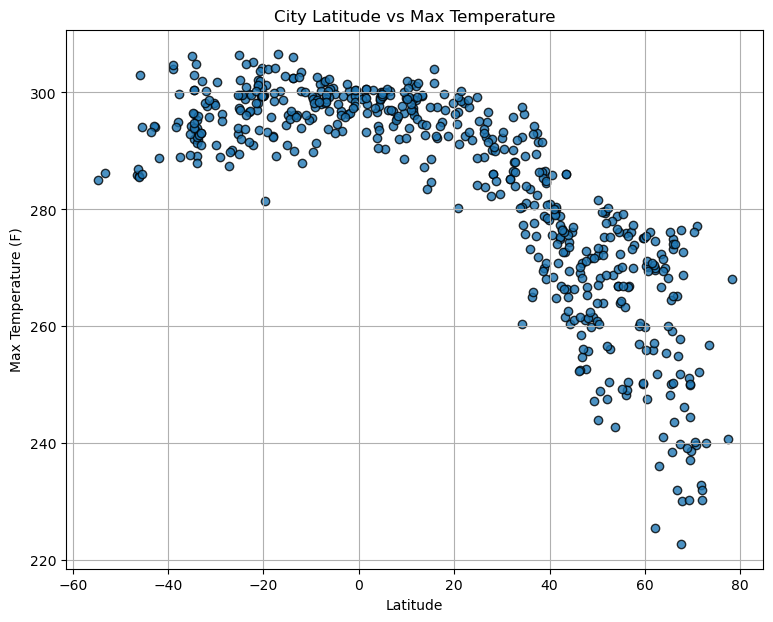

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

# Incorporate the other graph properties
fig1, ax1 = plt.subplots(figsize=(9,7))
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.title(f"City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

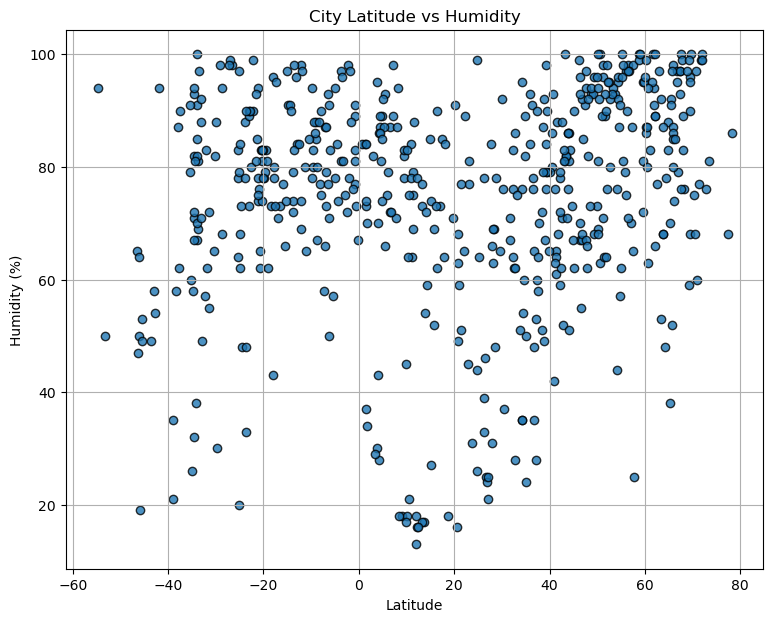

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

# Incorporate the other graph properties
fig1, ax1 = plt.subplots(figsize=(9, 7))
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

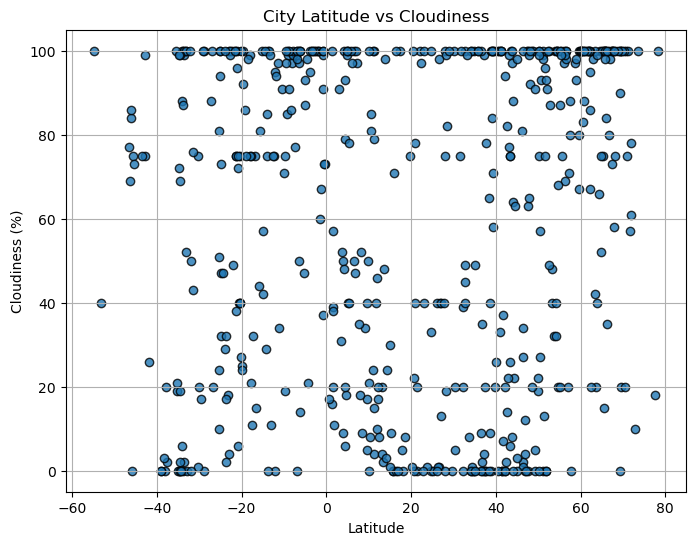

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

# Incorporate the other graph properties
fig1, ax1 = plt.subplots(figsize=(8,6))
markersize=12
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

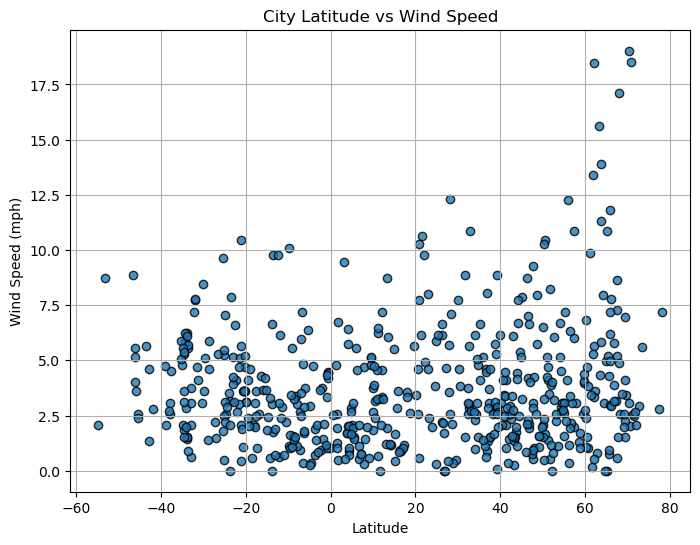

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

# Incorporate the other graph properties
fig1, ax1 = plt.subplots(figsize=(8,6))
markersize=12
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    fig1, ax1 = plt.subplots(figsize=(12,8))
    plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
    plt.plot(x_values,regress_values,"r-")
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label}",fontsize = 10)
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel(y_label,fontsize=14)
    if ylim is not None:
        plt.ylim(0, ylim)
    plt.annotate(line_eq, text_coordinates, fontsize=20, color="red")
    
        

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,hvide sande,56.0045,8.1294,275.98,75,100,12.25,DK,1675902299
6,berlevag,70.8578,29.0864,277.15,60,75,18.52,NO,1675902299
7,tuktoyaktuk,69.4541,-133.0374,237.15,68,20,1.54,CA,1675902300
8,jamestown,42.0970,-79.2353,274.95,78,0,2.57,US,1675902145
9,butaritari,3.0707,172.7902,300.44,82,91,9.47,KI,1675902300


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,new norfolk,-42.7826,147.0587,294.10,54,99,1.34,AU,1675902298
1,rikitea,-23.1203,-134.9692,299.71,73,18,5.14,PF,1675902029
2,ahipara,-35.1667,173.1667,294.28,60,21,4.79,NZ,1675902298
3,werda,-25.2667,23.2833,292.94,78,51,5.25,BW,1675902298
4,la arena,-5.3466,-80.7109,300.80,57,47,6.36,PE,1675902299


###  Temperature vs. Latitude Linear Regression Plot

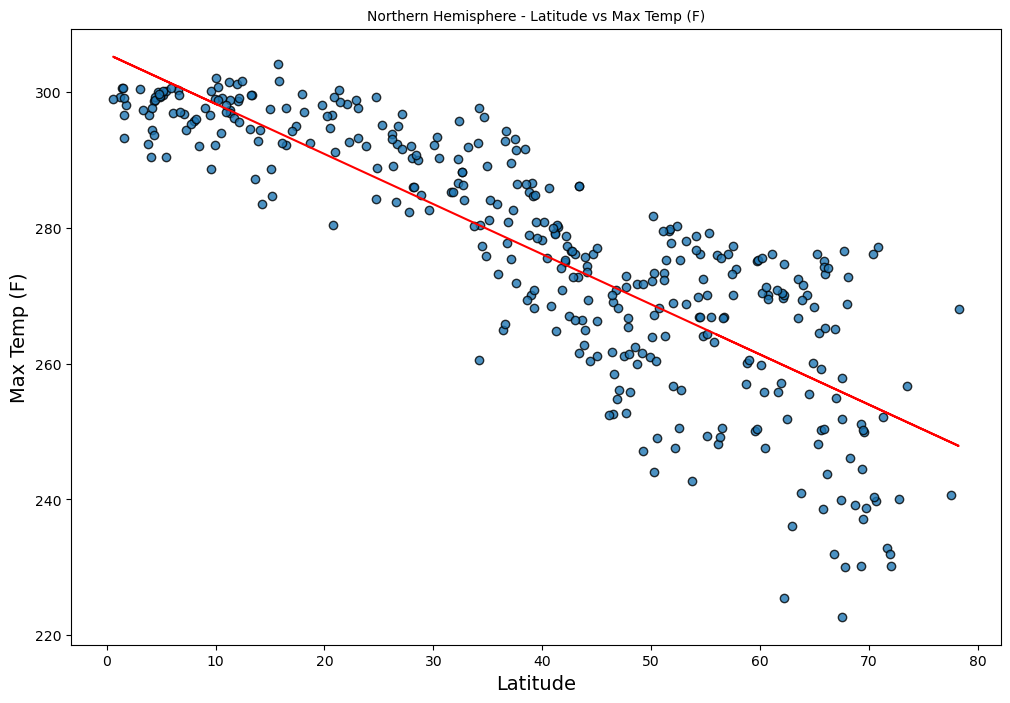

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Northern", (10, 10))

plt.savefig("./output_data/northern_hem_linear_lat_vs_max_temp.png", bbox_inches="tight")
plt.show()

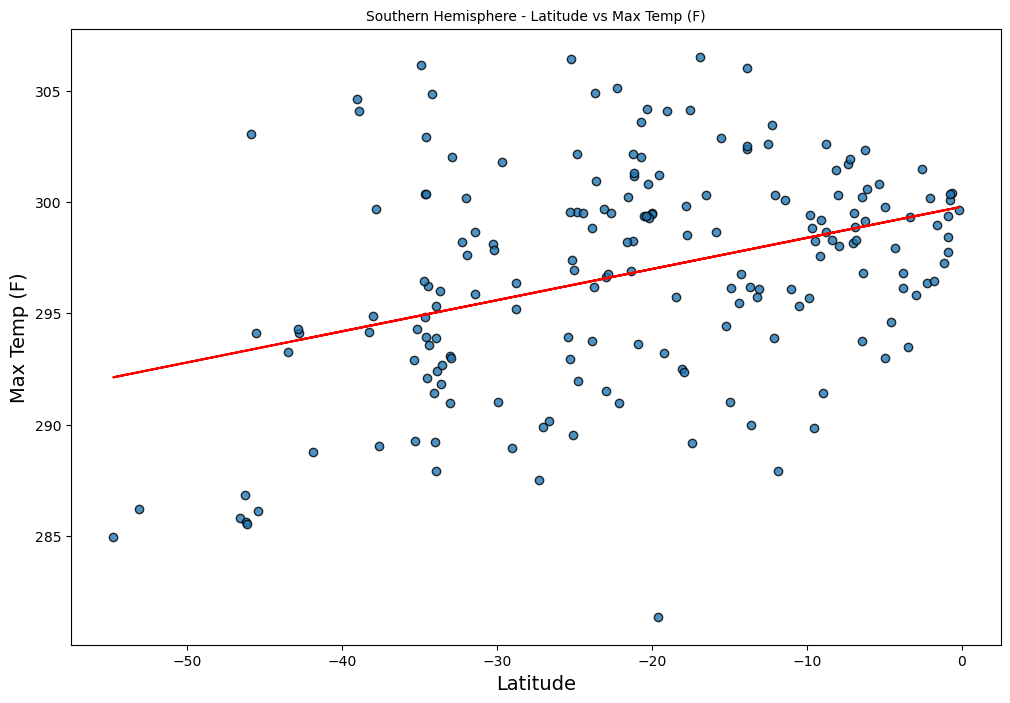

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Southern", (10, 10))

plt.savefig("./output_data/southern_hem_linear_lat_vs_max_temp.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** The correlation between latitude and maximum temperature is strong for both the hemispheres. It is higher for northern hemisphere, indicating that as we move away from the equator, the maximum temperature keeps dropping in a more linear manner.

### Humidity vs. Latitude Linear Regression Plot

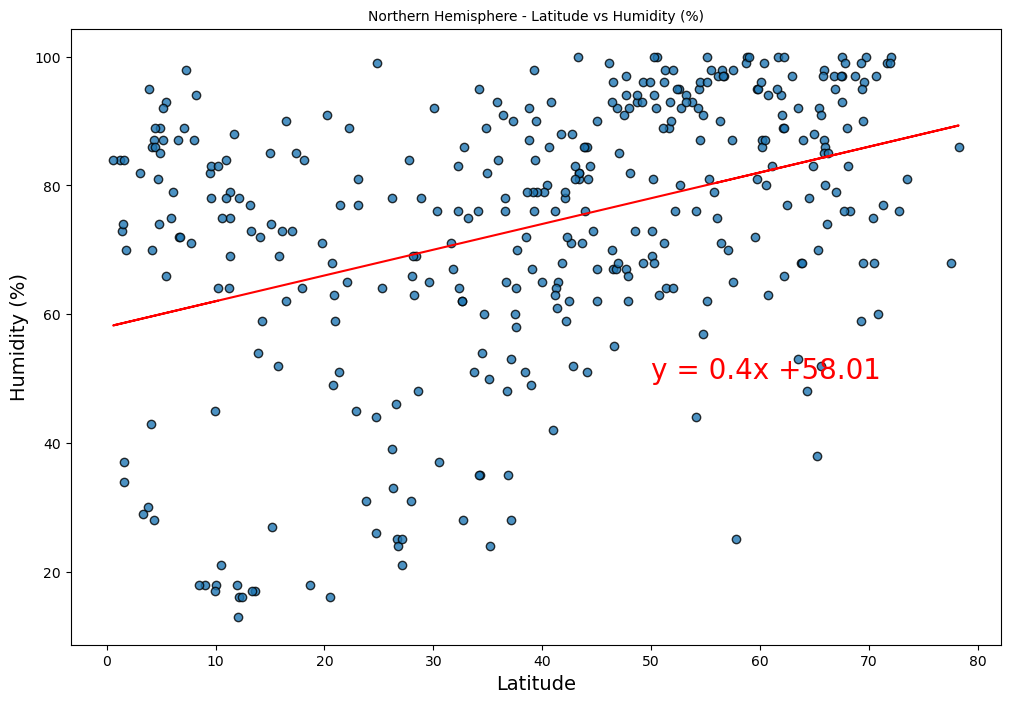

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(50,50))
plt.savefig("./output_data/northern_hem_linear_lat_vs_humidity.png", bbox_inches="tight")
plt.show()

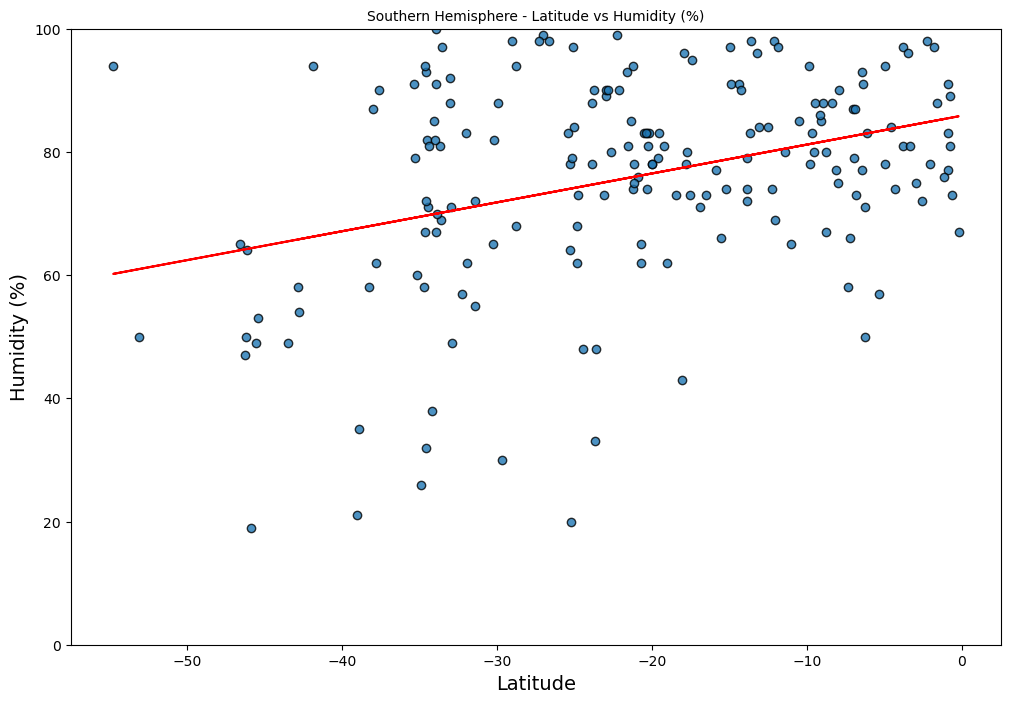

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Southern",(50, 50), 100)
plt.savefig("./output_data/southern_hem_linear_lat_vs_humudity.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** There is no correlation between latitude and humidity for southern hemisphere. For northern hemisphere, it is the same case, expect for the higher latitudes, where we can see some correlation (but not very strong)

### Cloudiness vs. Latitude Linear Regression Plot

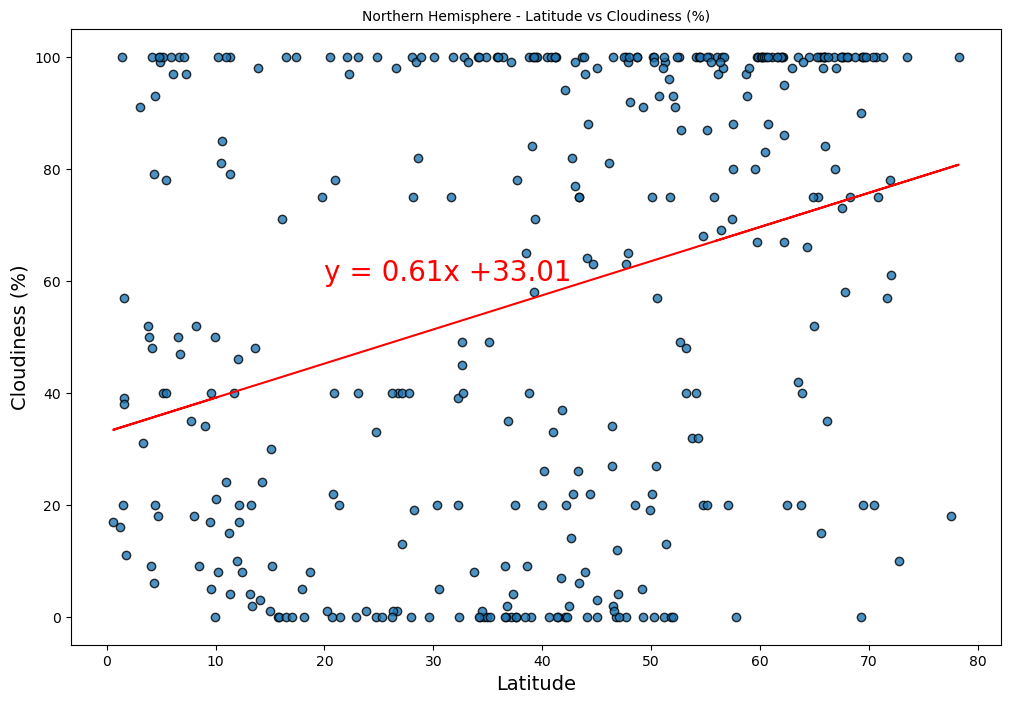

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", "Northern", (20, 60))

plt.savefig("./output_data/northern_hem_linear_lat_vs_cloudiness.png", bbox_inches="tight")
plt.show()

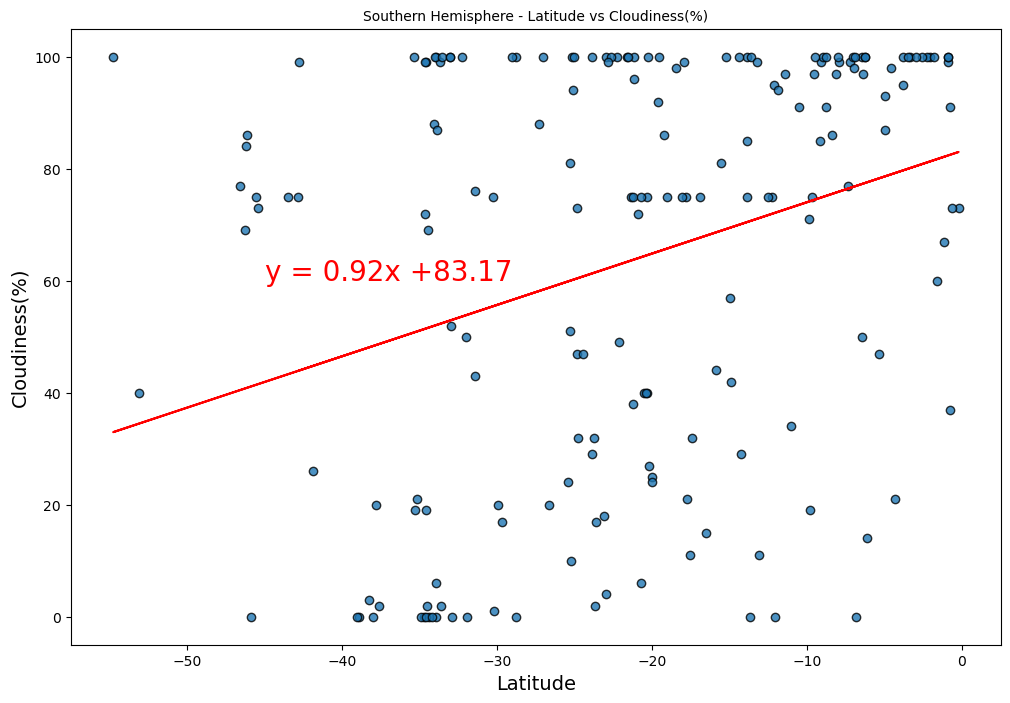

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))
plt.savefig("./output_data/southern_hem_linear_lat_vs_cloudiness.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** There is no correlation between latitude and cloudiness for both, southern and northern hemispheres. Both show scattered values all over the plots.

### Wind Speed vs. Latitude Linear Regression Plot

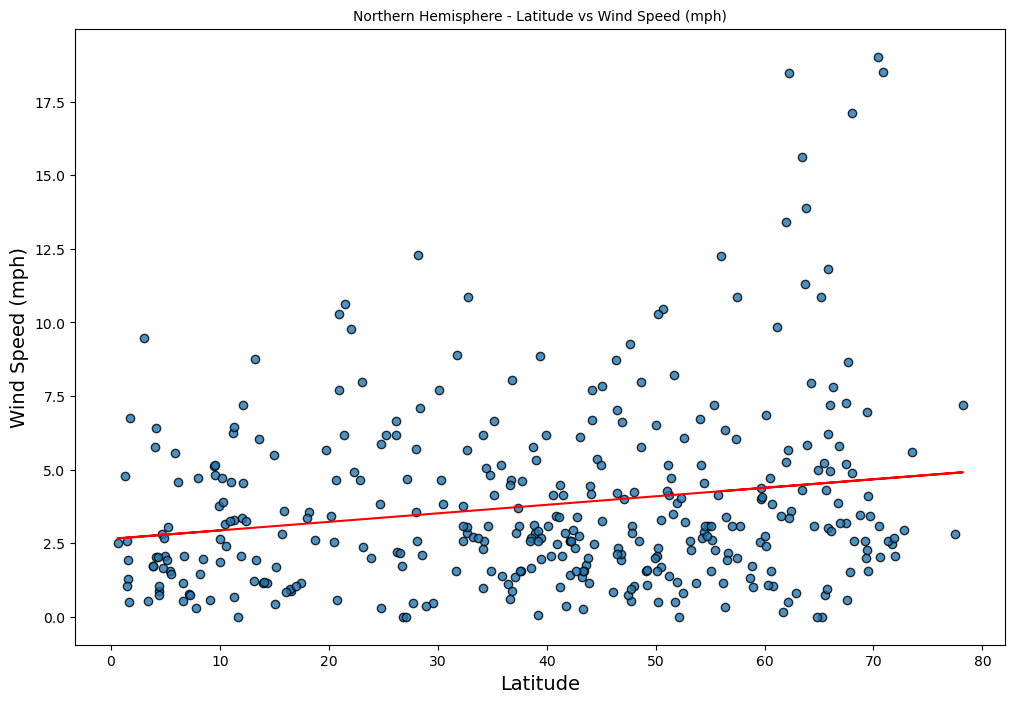

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern",(20, 25))
plt.savefig("./output_data/northern_hem_linear_lat_vs_wind_speed.png", bbox_inches="tight")
plt.show()

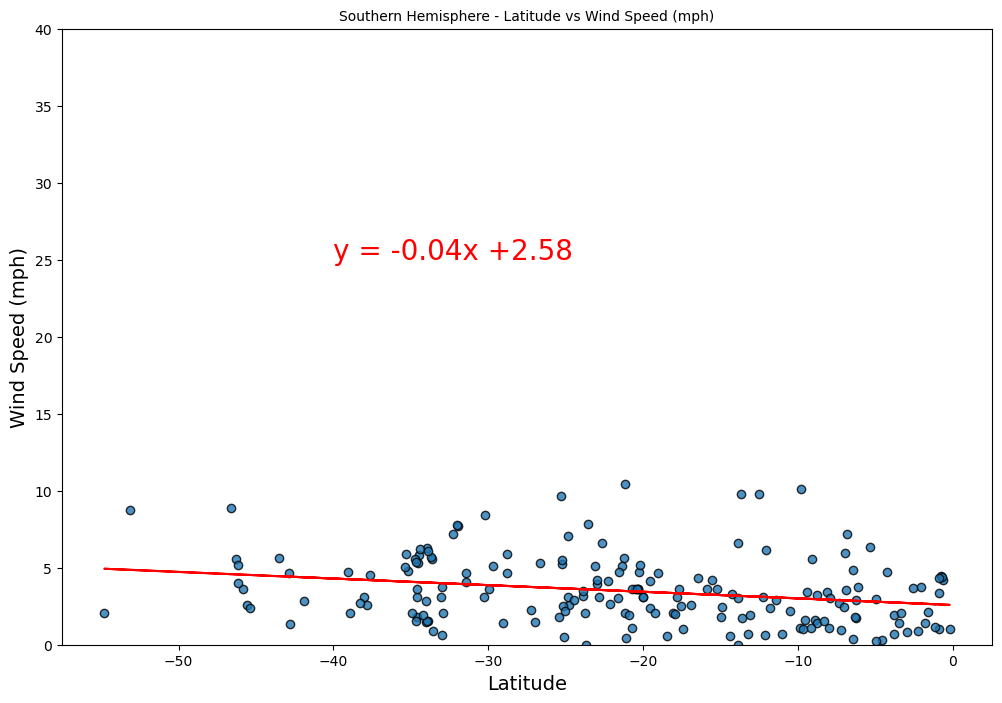

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern",(-40, 25), ylim=40)
plt.savefig("./output_data/southern_hem_linear_lat_vs_wind_speed.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** There is no correlation between latitude and wind speed either, for both hemispheres. Both show evenly scattered values over the latitudes.